In [15]:
import networkx as nx
import dataclasses
from src.vertex_params import VertexParams, VertexType
from tests.fixtures import mk_vertex

In [3]:
graph = nx.Graph()
graph.add_nodes_from(
    [(
        0,
        dataclasses.asdict(
            VertexParams(vertex_type=VertexType.START, position=(0.5, 0.5), level=0)
        ),
    )]
)

graph.add_nodes_from(
    [
        (0, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.START, position=(0.5, 0.5), level=0))),
        (1, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.EXTERIOR, position=(0.0, 1.0), level=1))),
        (2, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.EXTERIOR, position=(1.0, 0.0), level=1))),
        (3, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.EXTERIOR, position=(1.0, 1.0), level=1))),
        (4, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.INTERIOR, position=None, level=1))),
        (5, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.EXTERIOR, position=(0.5, 0.5), level=1))),
        (6, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.EXTERIOR, position=(0.5, 1.0), level=1))),
    ]
)



graph.add_edges_from(
    [
        (0, 4),

        (1, 4),
        (2, 4),
        (3, 4),

        (1, 5),
        (2, 5),
        (2, 3),
        (1, 6),
        (3, 6),
    ]
)

In [4]:
from src.visualization import draw

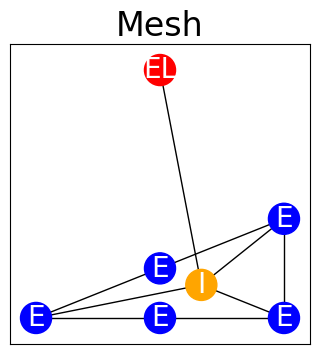

In [5]:
draw(graph, figsize=(3, 3))

In [6]:
from src.productions.production4 import Production4

In [7]:
prod4 = Production4()
subgraph = prod4.find_isomorphic_to_left_side(graph=graph)

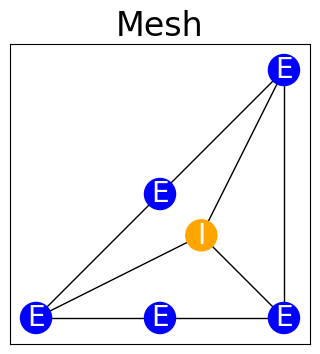

In [8]:
draw(subgraph, figsize=(3,3))

In [9]:
new_graph = prod4.apply(graph=graph, subgraph=subgraph)

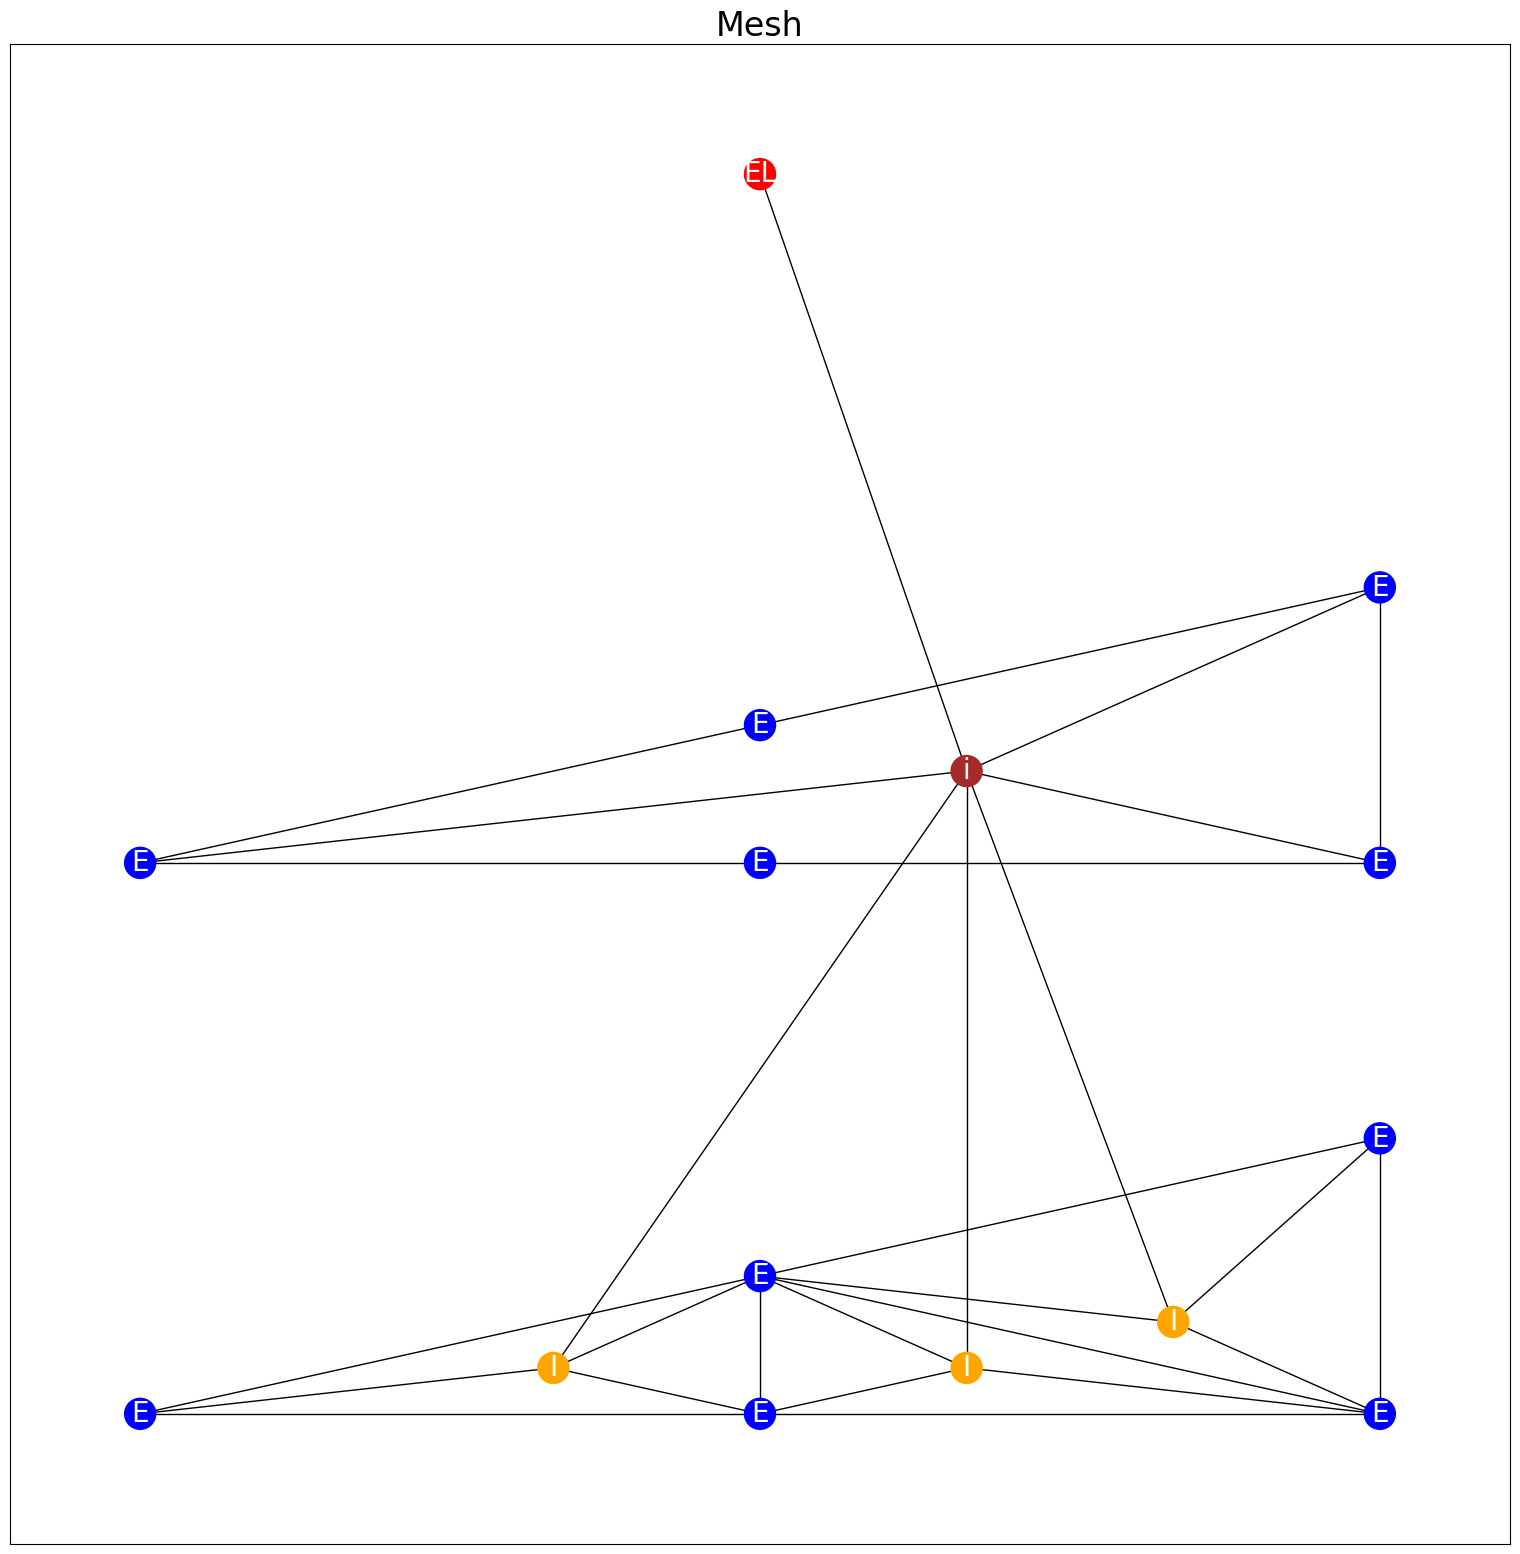

In [10]:
draw(new_graph, figsize=(15, 15))

Test visualization

In [16]:
def p4_left_side():
    graph = nx.Graph()

    graph.add_nodes_from(
        [
            (1, mk_vertex(VertexType.EXTERIOR, (0.0, 1.0), 0)),
            (2, mk_vertex(VertexType.EXTERIOR, (1.0, 0.0), 0)),
            (3, mk_vertex(VertexType.EXTERIOR, (1.0, 1.0), 0)),

            (4, mk_vertex(VertexType.INTERIOR, (1 / 3, 2 / 3), 0)),

            (5, mk_vertex(VertexType.EXTERIOR, (0.5, 0.5), 0)),
            (6, mk_vertex(VertexType.EXTERIOR, (0.5, 1), 0)),
        ]
    )

    graph.add_edges_from(
        [
            (1, 4),
            (2, 4),
            (3, 4),

            (1, 5),
            (2, 5),
            (2, 3),
            (1, 6),
            (3, 6),
        ]
    )
    return graph

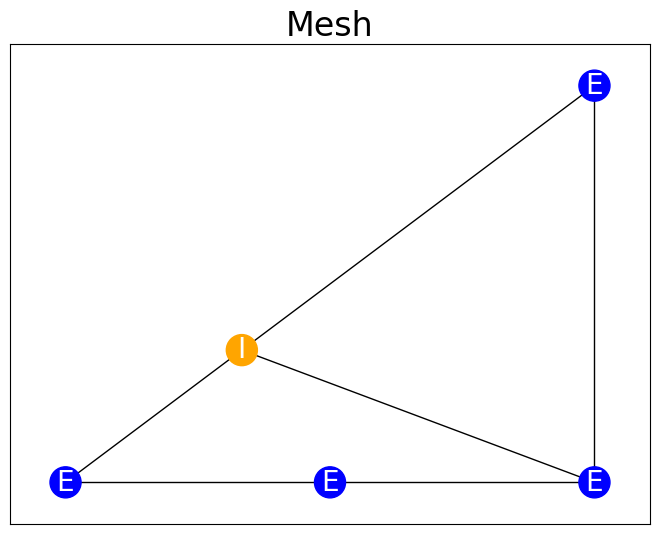

In [17]:
# test_should_not_find_isomorphic_when_node_removed

graph = p4_left_side()
graph.remove_node(5)
draw(graph)

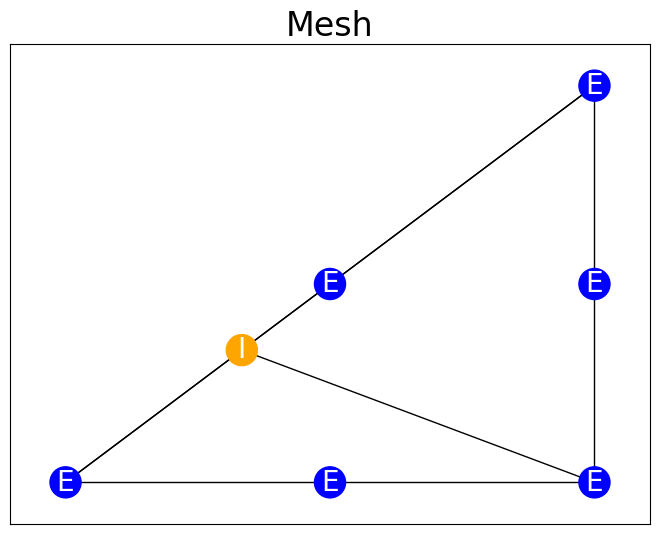

In [18]:
from tests.fixtures import mk_vertex

# test_should_not_find_isomorphic_when_third_breaking_node_added

graph = p4_left_side()
graph.add_nodes_from([(7, mk_vertex(VertexType.EXTERIOR, (1, 0.5), 0))])
graph.remove_edges_from([(2, 3)])
graph.add_edges_from([(2, 7), (3, 7)])
draw(graph)

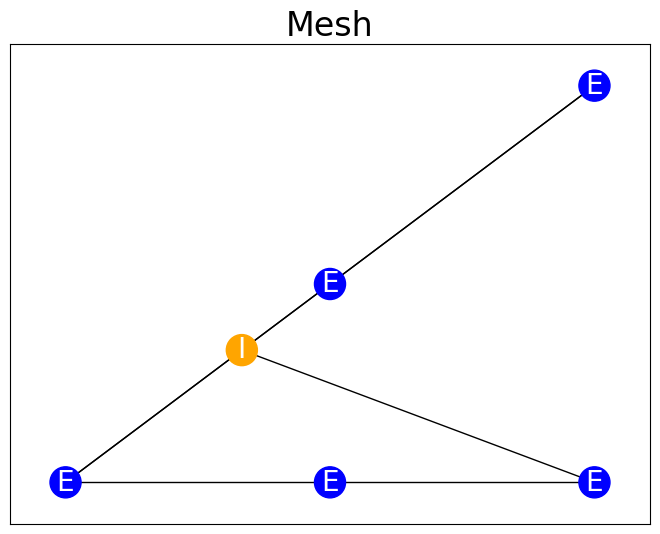

In [19]:
# test_should_not_find_isomorphic_when_edge_removed

graph = p4_left_side()
graph.remove_edge(2, 3)
draw(graph)

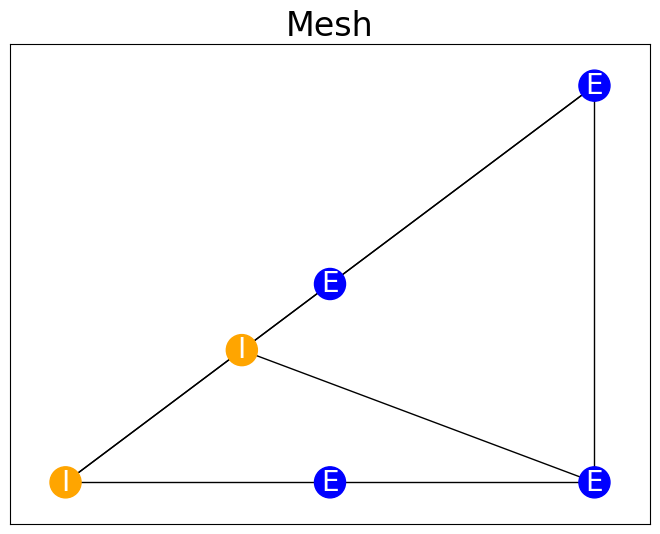

In [20]:
# test_should_not_find_isomorphic_when_node_type_changed

graph = p4_left_side()

node_1 = VertexParams(**graph.nodes[1])
graph.add_nodes_from([(1, dataclasses.asdict(dataclasses.replace(node_1, vertex_type=VertexType.INTERIOR)))])

draw(graph)

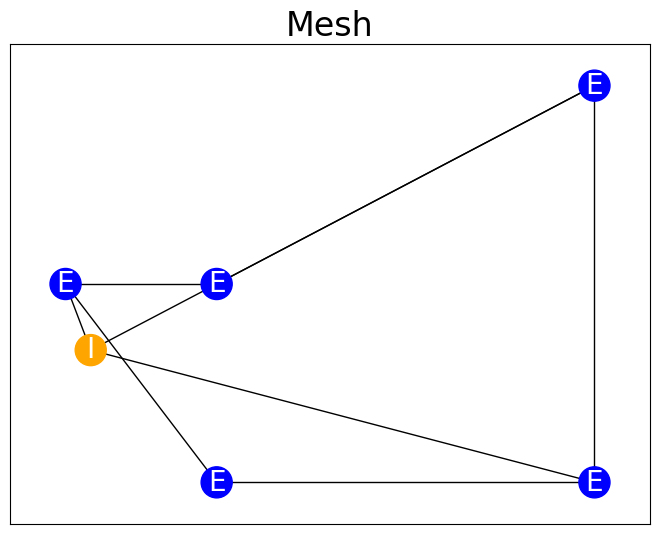

In [26]:
# test_should_not_find_isomorphic_when_node_position_changed

graph = p4_left_side()

node_5 = VertexParams(**graph.nodes[5])
graph.add_nodes_from([(1, dataclasses.asdict(dataclasses.replace(node_5, position=(0.3, 0.5))))])

draw(graph)